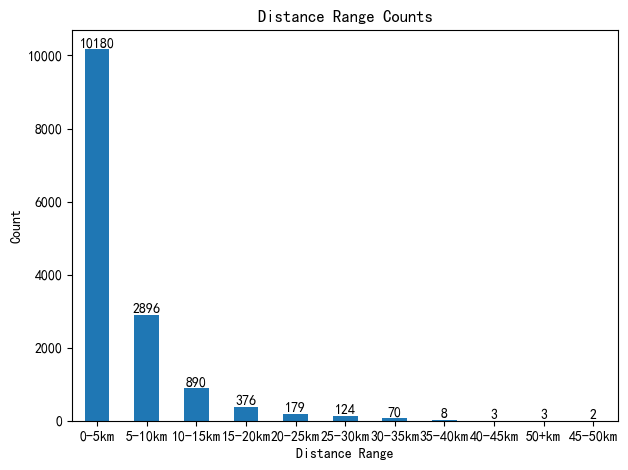

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
import csv
import math

data = pd.read_csv('./data/Taxi_clean_data.csv')

df=data['VehicleNum']
df1=data['SLng']
df2=data['SLat']
df3=data['ELng']
df4=data['ELat']

dataframe_obj = pd.DataFrame({'VehicleNum':df,'SLng':df1,'SLat':df2,'ELng':df3,'ELat':df4})

dataframe_obj_dropna=dataframe_obj.dropna()

def haversine(lon1, lat1, lon2, lat2):  
    # 将十进制度数转化为弧度  
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])  
    # 经度差  
    dlon = lon2 - lon1   
    # 纬度差  
    dlat = lat2 - lat1   
    # 计算a值  
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2  
    # 计算c值  
    c = 2 * math.asin(math.sqrt(a))   
    # 地球平均半径，单位为公里  
    R = 6371  
    # 计算结果，单位为公里  
    return c * R  

dataframe_obj_dropna['distances'] = dataframe_obj_dropna.apply(lambda row:
       haversine(row['SLng'], row['SLat'], row['ELng'], row['ELat']), axis=1)  

bins = [0,5,10,15,20,25,30,35,40,45,50,float('inf')]
distance_bins = pd.cut(dataframe_obj_dropna['distances'], bins, labels=
                       ['0-5km', '5-10km', '10-15km', '15-20km', '20-25km', '25-30km', '30-35km','35-40km','40-45km','45-50km','50+km'])  
  
# 使用value_counts统计每个区间的数量  
distance_counts = distance_bins.value_counts()  
   
distance_counts.plot(kind='bar', rot=0)  # rot=0确保x轴标签水平显示 

for index, value in enumerate(distance_counts.values):  
    plt.text(index, value, str(value), ha='center', va='bottom')
    
plt.title('Distance Range Counts')  
plt.xlabel('Distance Range')  
plt.ylabel('Count')  

plt.tight_layout()
plt.show()


In [3]:
dataframe_obj_dropna

,VehicleNum,SLng,SLat,ELng,ELat,distances
0,22223,114.167465,22.562468,114.225235,22.552750,6.029893
1,22223,114.227150,22.554167,114.229218,22.560217,0.705451
2,22223,114.231354,22.562166,114.255798,22.590967,4.068790
3,22223,114.240196,22.563650,114.119965,22.566668,12.350150
4,22223,114.135414,22.575933,114.166748,22.608267,4.824380
...,...,...,...,...,...,...
464712,36947,113.913734,22.531366,113.997284,22.545650,8.726521
464713,36947,114.005547,22.548067,113.996330,22.537083,1.545232
464714,36947,113.994598,22.535049,113.922485,22.496550,8.555421
464715,36947,113.921082,22.513483,113.929817,22.494217,2.322621


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
import csv
import math

data = pd.read_csv('./data/taxi_sz_data.csv')

#清洗数据
#后一位数和前一位数相等
#中间数和前一位数和后一位数都不相等
#三个相邻的车牌号相等
data=data.dropna()
data=data.sort_values(by=['VehicleNum','Stime'])
data = data[-((data['OpenStatus'].shift(-1) == data['OpenStatus'].shift())&
              (data['OpenStatus'].shift(-1) != data['OpenStatus'])&
             (data['VehicleNum'].shift(-1) == data['VehicleNum'].shift())&
             (data['VehicleNum'].shift(-1) == data['VehicleNum']))]
len(data)

1598866

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
import csv
import math

data = pd.read_csv('./data/taxi_sz_data.csv')

#清洗数据
#后一位数和前一位数相等
#中间数和前一位数和后一位数都不相等
#三个相邻的车牌号相等

data=data.sort_values(by=['VehicleNum','Stime'])
data = data[-((data['OpenStatus'].shift(-1) == data['OpenStatus'].shift())&
              (data['OpenStatus'].shift(-1) != data['OpenStatus'])&
             (data['VehicleNum'].shift(-1) == data['VehicleNum'].shift())&
             (data['VehicleNum'].shift(-1) == data['VehicleNum']))]
data=data.dropna()
len(data)

1598866

In [66]:
df=data[data['VehicleNum']==22271]
df[df['OpenStatus']==1]

,VehicleNum,Stime,Lng,Lat,OpenStatus,Speed


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
import csv
import math

data = pd.read_csv('./data/taxi_sz_data.csv')

len(data)

1601307

In [40]:
dataframe_obj_dropna

,VehicleNum,SLng,SLat,ELng,ELat,distances
0,22223,114.167465,22.562468,114.225235,22.552750,316.661423
1,22223,114.227150,22.554167,114.229218,22.560217,40.116607
2,22223,114.231354,22.562166,114.255798,22.590967,224.753581
3,22223,114.240196,22.563650,114.119965,22.566668,643.398730
4,22223,114.135414,22.575933,114.166748,22.608267,263.705042
...,...,...,...,...,...,...
464712,36947,113.913734,22.531366,113.997284,22.545650,463.506823
464713,36947,114.005547,22.548067,113.996330,22.537083,86.016164
464714,36947,113.994598,22.535049,113.922485,22.496550,467.140591
464715,36947,113.921082,22.513483,113.929817,22.494217,131.975973


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
import csv
import math
from datetime import datetime


data = pd.read_csv('./data/Taxi_sz_data.csv')

df1=data['Stime']
df2=data['OpenStatus']
df3=data['Speed']

dataframe_obj = pd.DataFrame({'Stime':df1,'OpenStatus':df2,'Speed':df3})
dataframe_obj_dropna=dataframe_obj.dropna()

dataframe_obj_dropna=dataframe_obj_dropna[dataframe_obj_dropna['OpenStatus']==1]

date_index = pd.to_datetime(dataframe_obj_dropna['Stime'])

data_ser = pd.Series(list(dataframe_obj_dropna['Speed']),index=date_index)



C:\Users\86139\AppData\Local\Temp\ipykernel_22580\1962960580.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_index = pd.to_datetime(dataframe_obj_dropna['Stime'])


Stime
2024-06-20 19:16:38    24
2024-06-20 12:13:14     1
2024-06-20 12:53:52    42
2024-06-20 12:06:54    41
2024-06-20 12:56:35    29
                       ..
2024-06-20 22:26:24    55
2024-06-20 19:51:17    22
2024-06-20 19:50:27     4
2024-06-20 19:49:37    11
2024-06-20 20:15:13    48
Length: 670022, dtype: int64

In [53]:
dataframe_obj_dropna

,Stime,OpenStatus,Speed
3293,19:16:38,1,24
3296,12:13:14,1,1
3297,12:53:52,1,42
3298,12:06:54,1,41
3299,12:56:35,1,29
...,...,...,...
1601295,22:26:24,1,55
1601299,19:51:17,1,22
1601300,19:50:27,1,4
1601301,19:49:37,1,11


In [ ]:
  #C:\Program Files (x86)\PremiumSoft\Navicat for MySQL